# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import string
from function import *

# Visualisation du dataset

In [3]:
train = pd.read_csv("data/train.csv")
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train.shape

(20800, 5)

In [5]:
train["label"].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

In [6]:
train["author"].value_counts()

author
Pam Key                                      243
admin                                        193
Jerome Hudson                                166
Charlie Spiering                             141
John Hayward                                 140
                                            ... 
Jeremy R. Hammond                              1
Vic Bishop                                     1
Douglas Martin                                 1
Najim Rahim and Fahim Abed                     1
Michael J. de la Merced and Rachel Abrams      1
Name: count, Length: 4201, dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
train.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
fake = train[train["label"]==1]
fake

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
...,...,...,...,...,...
20788,20788,Maine’s Gov. LePage Threatens To ‘Investigate’...,Joe Clark,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
20791,20791,Lawyer Who Kept Hillary Campaign Chief Out of ...,Daniel Greenfield,Lawyer Who Kept Hillary Campaign Chief Out of ...,1
20793,20793,Idiot Who Destroyed Trump Hollywood Star Gets ...,Robert Rich,Share This \nAlthough the vandal who thought i...,1
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [10]:
real = train[train["label"]==0]
real

,id,title,author,text,label
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
...,...,...,...,...,...
20792,20792,"Jakarta Bombing Kills Three Police Officers, L...",John Hayward,Two suicide bombers attacked a bus station in ...,0
20794,20794,Trump: Putin ’Very Smart’ to Not Retaliate ove...,Lee Stranahan,Donald Trump took to Twitter Friday to praise ...,0
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0


# EDA

<Axes: xlabel='label', ylabel='id'>

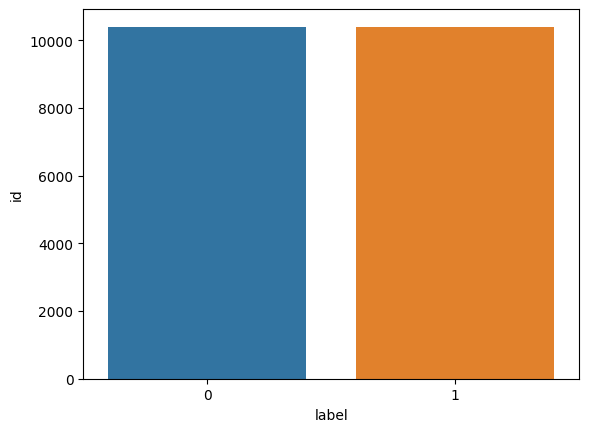

In [11]:
sns.barplot(train, x="label", y="id", errorbar=None)

Number of words in all_text: 40370280


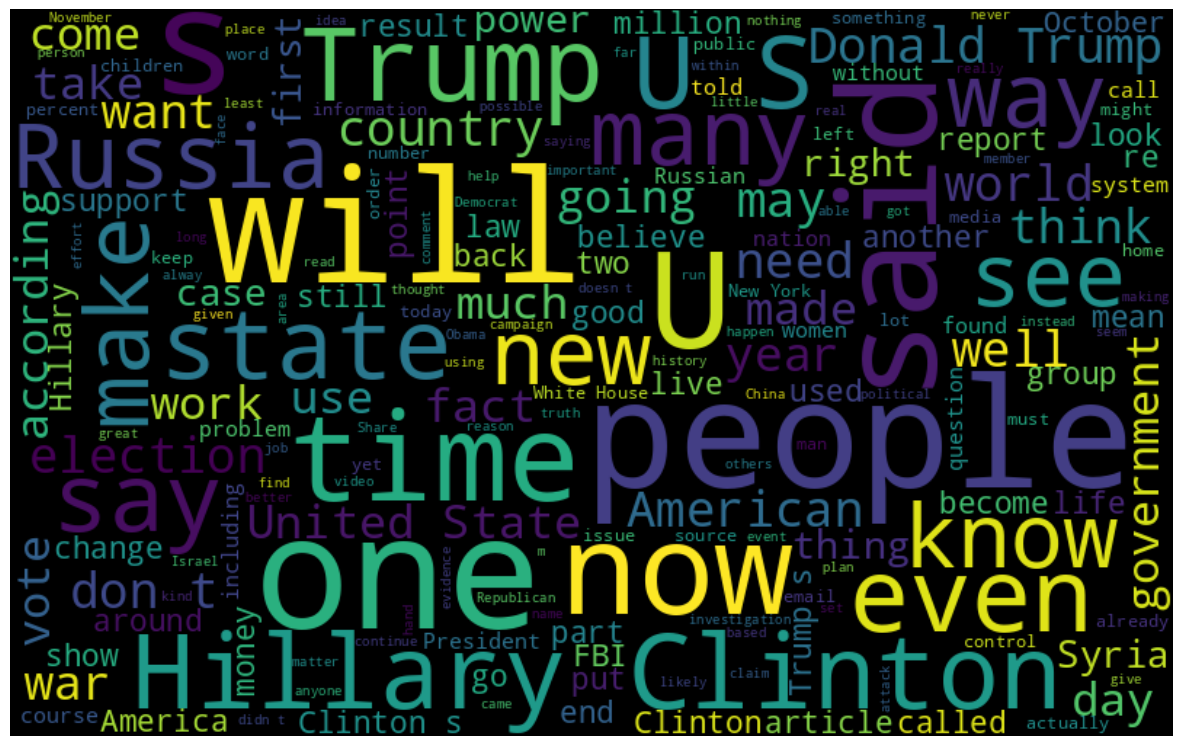

In [12]:
wordcloud(fake['text'])

Number of words in all_text: 54169559


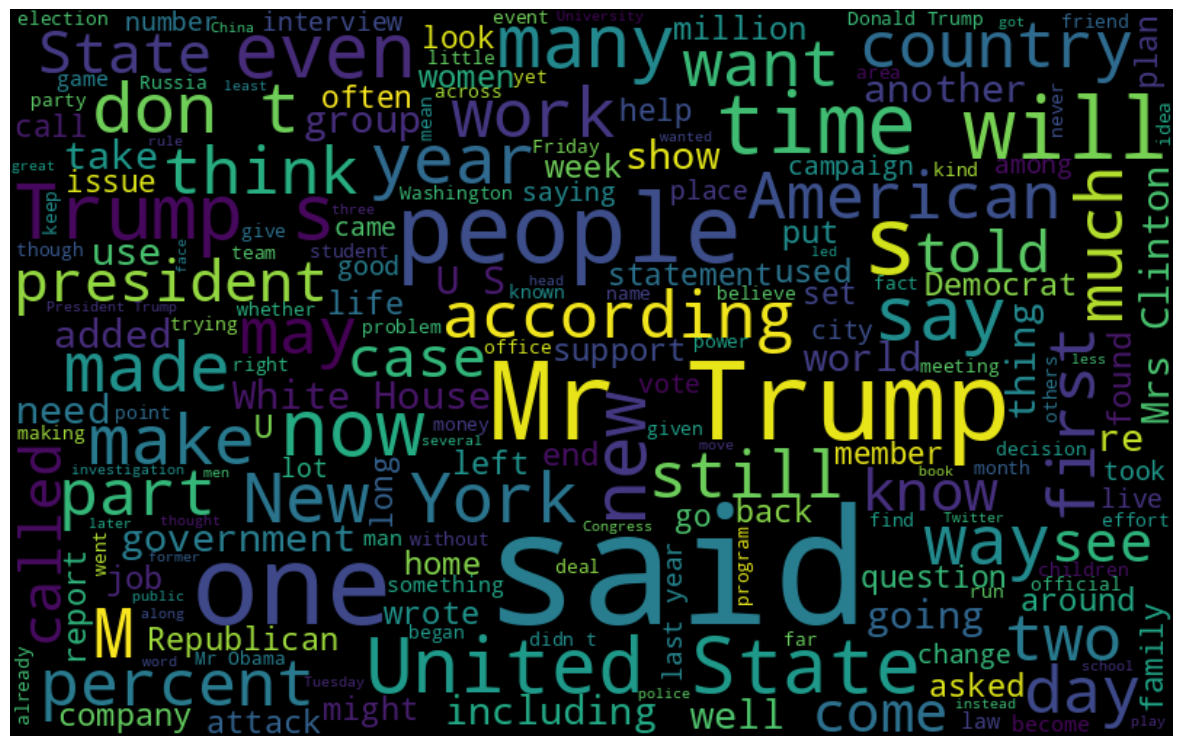

In [13]:
wordcloud(real['text'])

['would', 'Trump', 'Clinton', 'people', 'one', 'Hillary', '–', 'also', 'like', '—', 'said', 'even', 'US', 'could', 'many', '2016', 'American', 'de', 'new', 'time', 'U.S.', 'get', 'Obama', 'government', 'Donald']


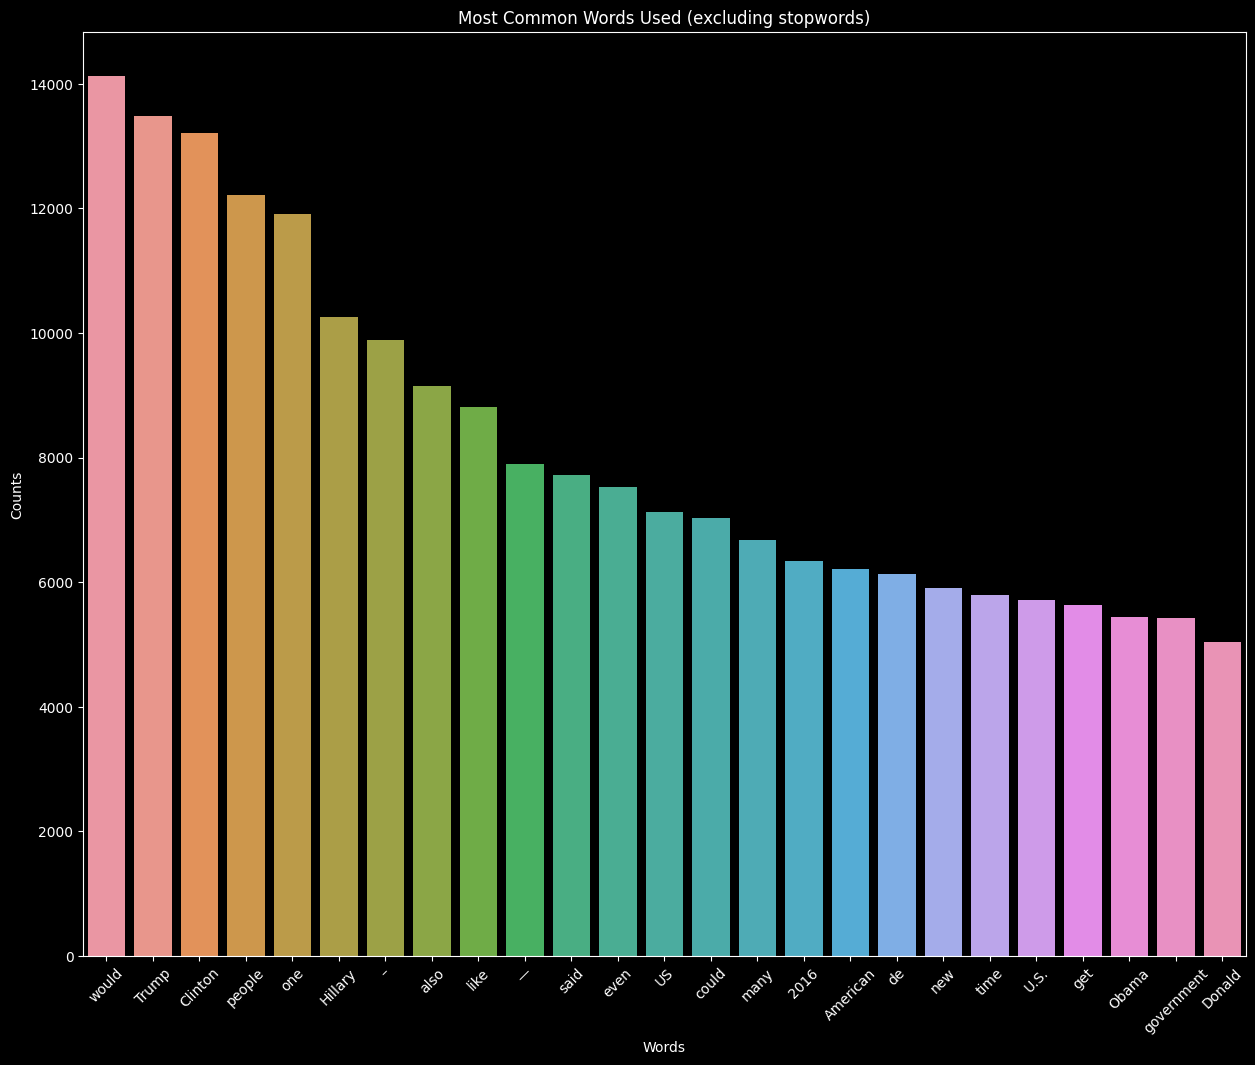

In [14]:
bar_plot(fake["text"])

['Mr.', '”', 'said', '—', 'Trump', 'would', 'said.', 'one', 'people', 'also', 'like', 'Ms.', 'could', 'two', 'new', 'United', 'first', '“I', 'many', 'last', 'said,', 'New', 'American', 'even', 'Trump’s']


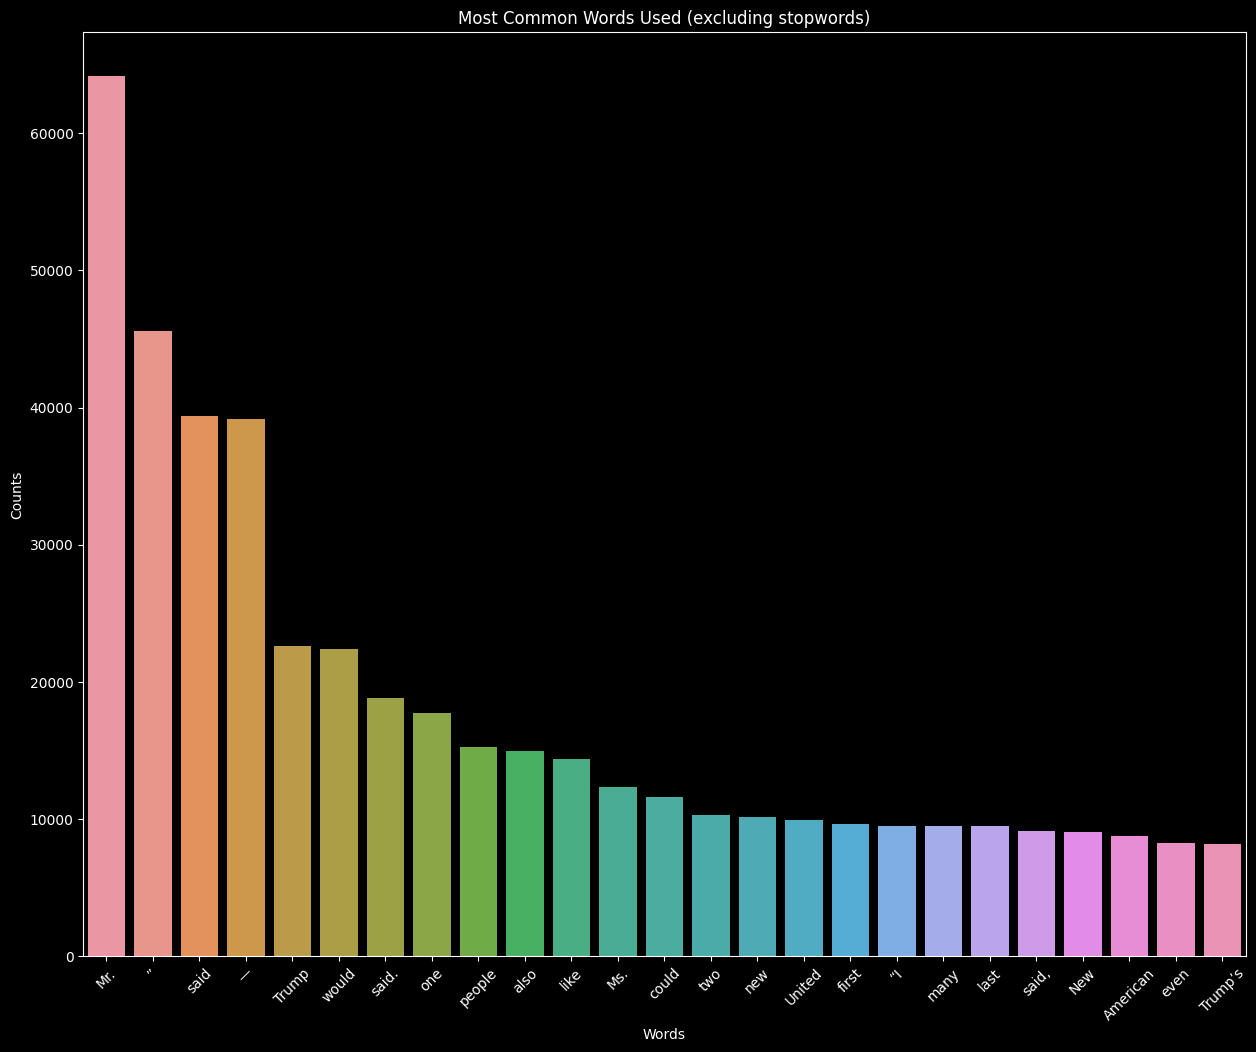

In [15]:
bar_plot(real["text"])

In [16]:
fake["author"].value_counts()

author
admin                          193
Pakalert                        86
Eddy Lavine                     85
Starkman                        84
Gillian                         82
                              ... 
BabaLooey                        1
Roger I. Roots, J.D., Ph.D.      1
Birdie Houck                     1
Jack Kerwick                     1
Judge Andrew Napolitano          1
Name: count, Length: 1981, dtype: int64

In [17]:
real["author"].value_counts()

author
Pam Key                                       242
Jerome Hudson                                 166
Charlie Spiering                              141
John Hayward                                  140
Katherine Rodriguez                           124
                                             ... 
Kenneth Chang, Mike Isaac and Matt Richtel      1
Cecilia Kang and Michael D. Shear               1
Adam Nagourney and Jonathan Martin              1
Frances Robles and Kirk Semple                  1
Michael J. de la Merced and Rachel Abrams       1
Name: count, Length: 2225, dtype: int64

['New', 'York', 'Times', 'Breitbart', 'Trump', 'Donald', 'Trump’s', 'U.S.', 'Says', 'Briefing', 'Obama', 'Hillary', 'House', 'State', 'Trump,', 'Clinton', 'President', 'White', 'Bill', 'Police', 'Evening', 'News', 'First', 'Attack', 'Russia']


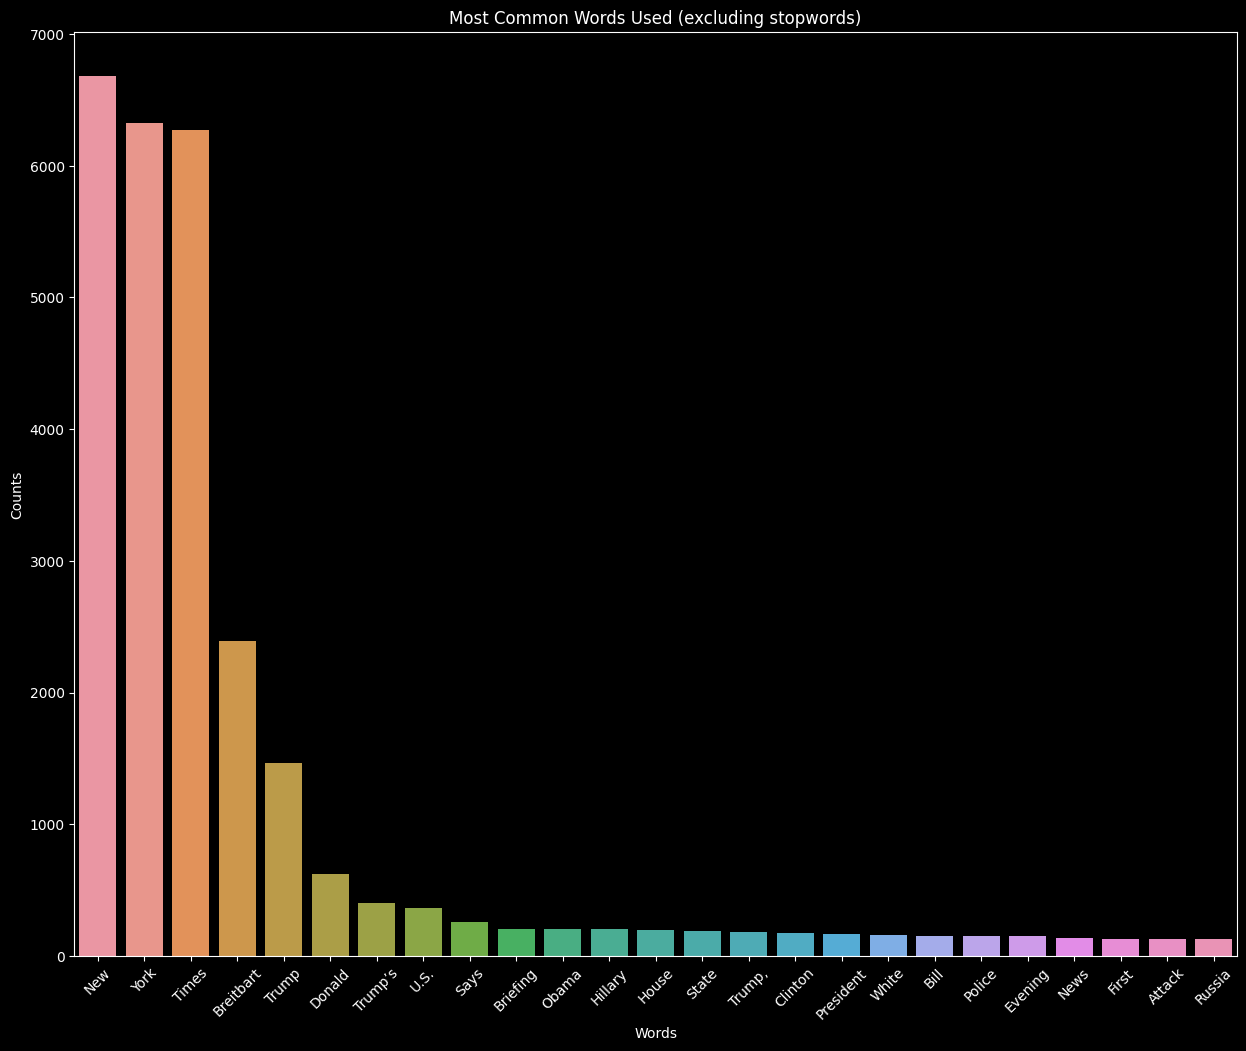

In [18]:
bar_plot(real["title"])

['Trump', 'Hillary', 'Clinton', 'nan', '–', 'New', 'US', 'Comment', 'Election', 'FBI', 'News', 'Russia', 'Donald', 'War', 'World', 'Obama', 'de', 'Trump’s', 'America', 'Russian', 'U.S.', '2016', 'Re:', 'Campaign', 'Emails']


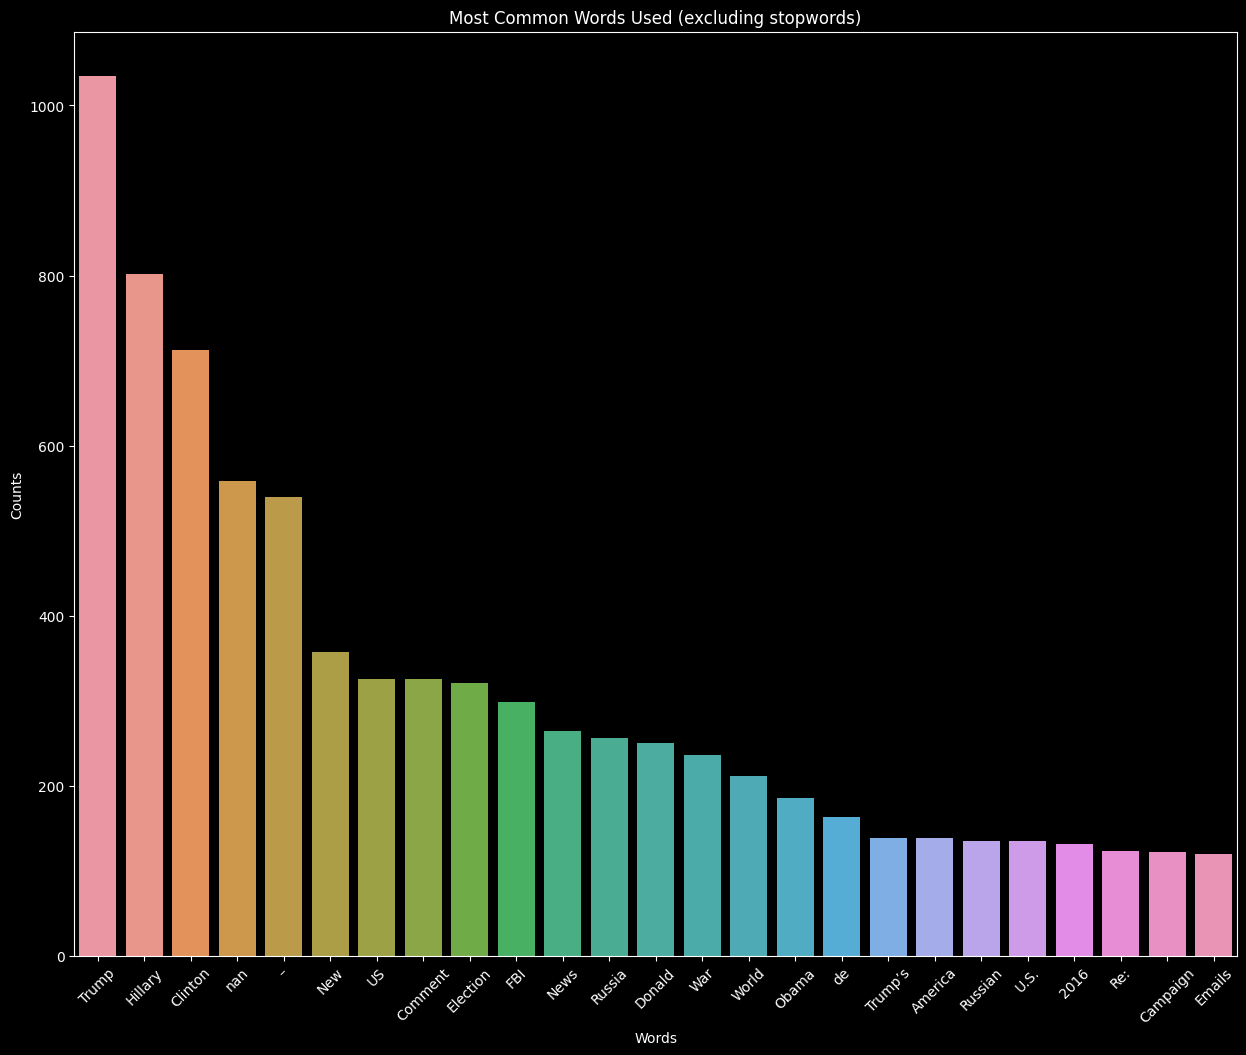

In [19]:
bar_plot(fake["title"])

['nan', 'admin', '(noreply@blogger.com)', 'noreply@blogger.com', 'Anonymous', 'Jason', 'David', 'Editor', 'Michael', 'Alex', 'News', 'Author', 'Pakalert', 'Staff', 'Doc', 'Eddy', 'Lavine', 'Starkman', 'Dave', 'Ansary', 'Gillian', 'Post', 'Times', '(Alexander', 'Light)']


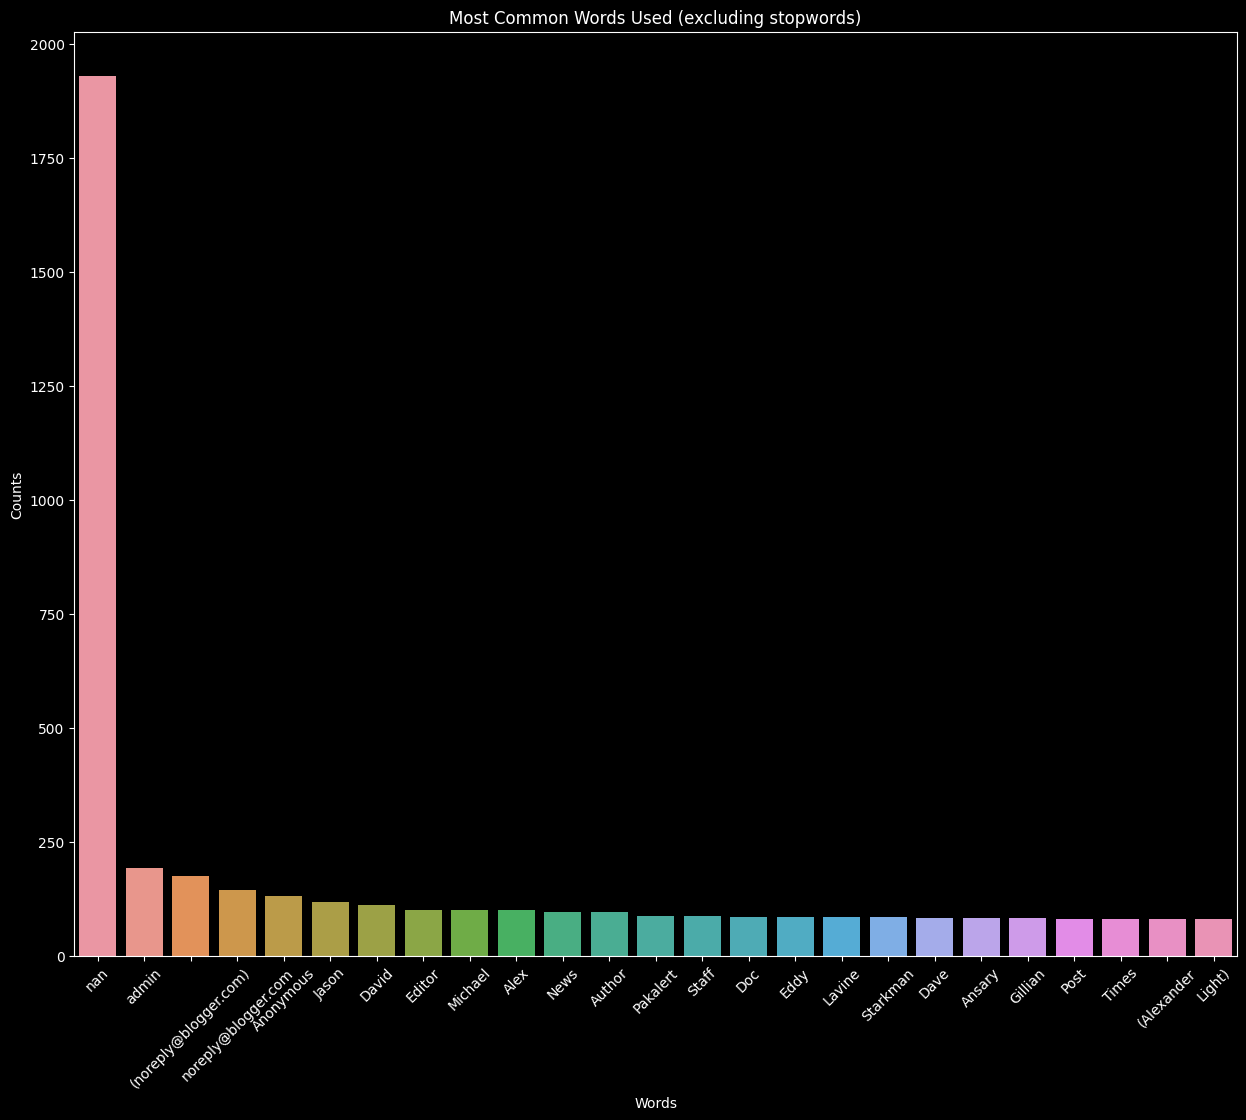

In [20]:
bar_plot(fake["author"])

['Michael', 'Breitbart', 'John', 'Charlie', 'Pam', 'Key', 'Daniel', 'Ian', 'D.', 'Jerome', 'Hudson', 'Ben', 'Baker', 'Neil', 'David', 'Alan', 'Stevenson', 'Maggie', 'Spiering', 'Hayward', 'Haberman', 'Adam', 'Sandra', 'Thomas', 'J.']


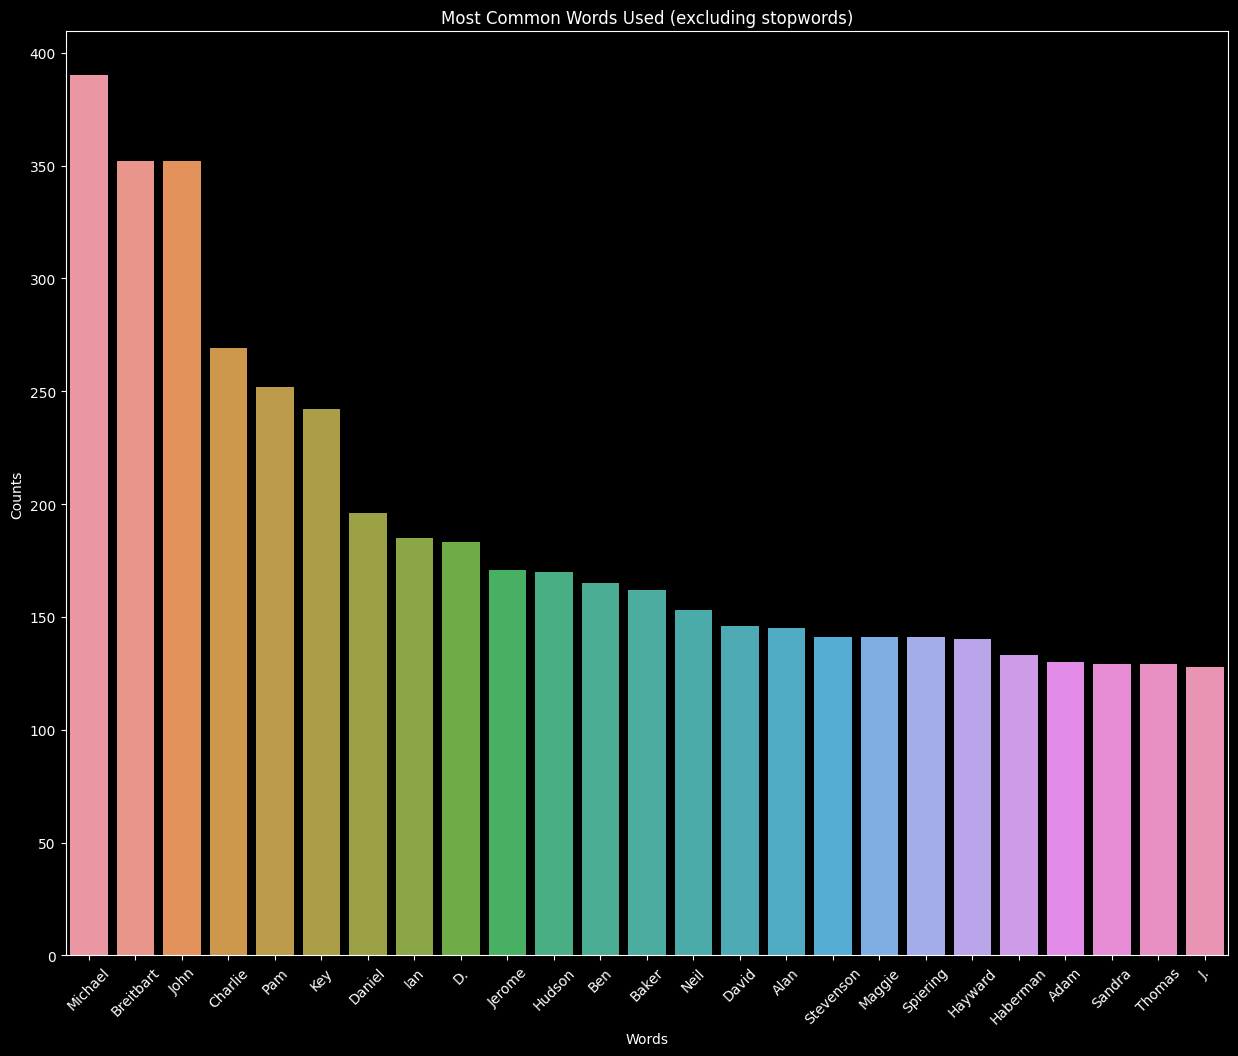

In [21]:
bar_plot(real["author"])